## Kernel Density Estimation

In [1]:
import numpy
from matplotlib import pyplot
import chaospy

numpy.random.seed(1000)

In [2]:
samples = chaospy.Uniform(0, 1).sample((2, 7))
distribution = chaospy.GaussianKDE(samples)
distribution

GaussianKDE()

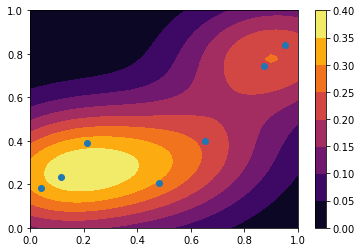

In [3]:
mesh = numpy.mgrid[0:1:50j, 0:1:50j]
pyplot.contourf(mesh[0], mesh[1], distribution.pdf(mesh))
pyplot.colorbar()
pyplot.scatter(*samples)
pyplot.show()

### Data Driven PCE

With the KDE created, it is possible to create orthogonal polynomial chaos expansions directly:

In [4]:
distribution = chaospy.GaussianKDE(samples)
expansion = chaospy.orth_chol(2, distribution)
expansion.round(4)

polynomial([1.0, q1-0.428, -0.7841*q1+q0-0.1396,
            q1**2-0.9383*q1-0.0324*q0+0.1426,
            -0.5987*q1**2+q0*q1-0.0358*q1-0.414*q0+0.1014,
            0.5853*q1**2-1.3151*q0*q1+q0**2+0.1073*q1-0.3699*q0-0.0697])

The distribution also supports generation of samples. For example:

--Return--
> <ipython-input-7-9f2d7d0ed6cf>(2)<module>()->None
-> import pdb; pdb.set_trace()
(Pdb) c


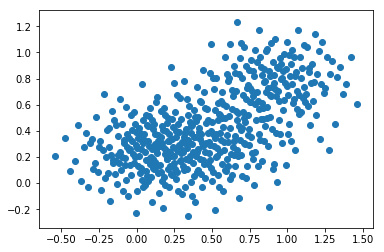

In [7]:
samples_ = distribution.sample(500, rule="halton")
pyplot.scatter(*samples_)
pyplot.show()

This can then be used to create a model approximation using Point Collocation Method.

### Smoothing

Smoothing is defined through an smoothing matrix, or H-matrix. It differs from the one dimensional bandwidth definition by corresponding to the covariance of each sample, instead of the standard deviation. So if you want to provide a bandwidth paramter, this needs to be squared:

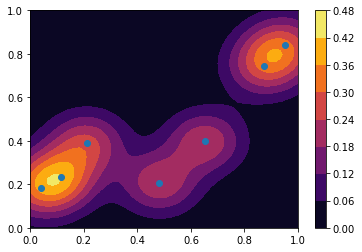

In [6]:
bandwidth = 0.1
distribution = chaospy.GaussianKDE(samples, h_mat=bandwidth**2)
pyplot.contourf(mesh[0], mesh[1], distribution.pdf(mesh))
pyplot.colorbar()
pyplot.scatter(*samples)
pyplot.show()

Anisotropic bandwidths for each dimension. In this case the bandwith squared is provided one per dimension:

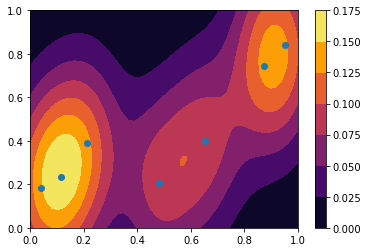

In [7]:
distribution = chaospy.GaussianKDE(samples, h_mat=[0.1**2, 0.3**2])
pyplot.contourf(mesh[0], mesh[1], distribution.pdf(mesh))
pyplot.colorbar()
pyplot.scatter(*samples)
pyplot.show()

It is also possible to define a covariance structure between the dimensions:

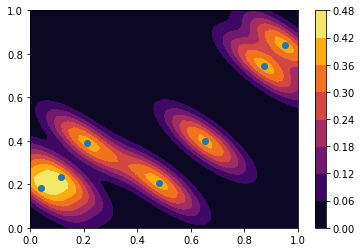

In [8]:
h_mat = [[0.01, -0.008], [-0.008, 0.01]]
distribution = chaospy.GaussianKDE(samples, h_mat)

pyplot.contourf(mesh[0], mesh[1], distribution.pdf(mesh))
pyplot.colorbar()
pyplot.scatter(*samples)
pyplot.show()

### Gaussian Mixture Model

The difference between KDE and GMM is small. KDE is more designed for "many samples", while GMM focuses on mean-covariance for each sample. There is also a language difference. But otherwise they do the same thing.

So, if we replace the word "samples" with "mean" and "bandwidth" with "covariance", everything start to look like a GMM:

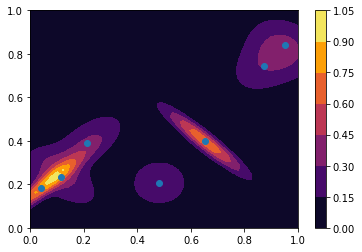

In [9]:
mean = samples
covariances = numpy.zeros((2, 2, 7))
covariances[0, 0] = covariances[1, 1] = 0.01
covariances[0, 1] = covariances[1, 0] = numpy.linspace(-0.0095, 0.0095, 7)
distribution = chaospy.GaussianKDE(mean, covariances)

pyplot.contourf(mesh[0], mesh[1], distribution.pdf(mesh))
pyplot.colorbar()
pyplot.scatter(*samples)
pyplot.show()